# DSP Fundamentals with Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct
from scipy import signal as sg

### Sinusoidal Wave Generation

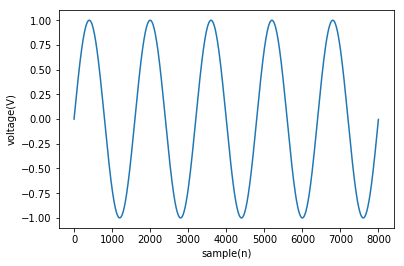

In [2]:
Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

Square Wave Generation

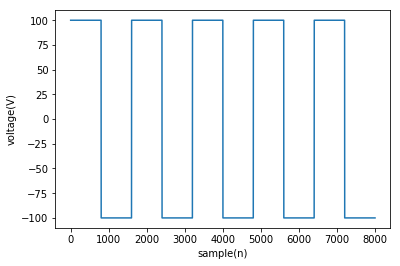

In [3]:
y1 = 100* sg.square(2 *np.pi * f *x / Fs )
plt.plot(x, y1)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

### Square Wave with Duty Cycle

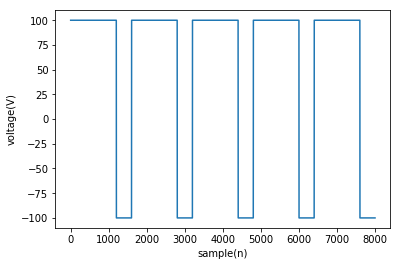

In [4]:
y2 = 100* sg.square(2 *np.pi * f *x / Fs , duty = 0.75)
plt.plot(x, y2)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

### Read & Plot a .wav Audio File using Matplotlib 

In [6]:
pwd

'C:\\Users\\student\\Downloads'

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.


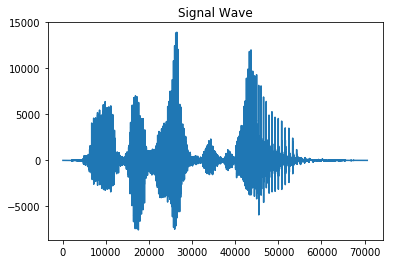

In [7]:
import wave
import sys

## Store .wav file in Working Directory. (Type pwd and run to find out the working Directory.)
## Or Attach the Entire Filepath  "C:\\Users\\Downloads\\my_audio_track.wav"
spf = wave.open('C:\\Users\\student\\maybe-next-time.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, 'Int16')

plt.figure(1)
plt.title('Signal Wave')
plt.plot(signal)
plt.show()

### Plotting CT Signal x(t) = Asin(2πft);  A= 325V, f = 50Hz

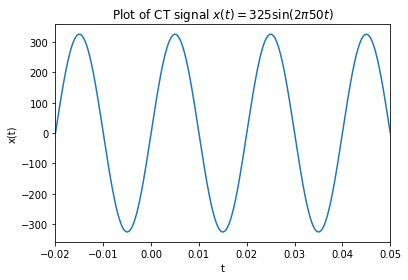

In [8]:
#linspace returns numbers over evenly spaced intervals
t = np.linspace(-0.02, 0.05, 1000)

plt.plot(t, 325 * np.sin(2*np.pi*50*t));

plt.xlabel('t');

plt.ylabel('x(t)');

plt.title(r'Plot of CT signal $x(t)=325 \sin(2\pi 50 t)$');

plt.xlim([-0.02, 0.05]);

plt.show()

### Plot of DT Signal x[n] = Asin(2πfnΔt); Stem Plot

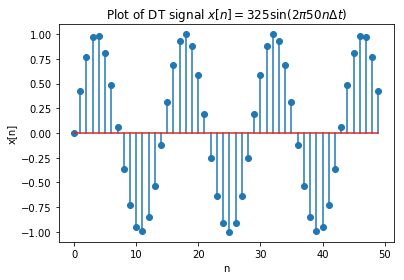

In [9]:
n = np.arange(50);

dt = 0.07/50

x = np.sin(2 * np.pi * 50 * n * dt)

plt.xlabel('n');

plt.ylabel('x[n]');

plt.title(r'Plot of DT signal $x[n] = 325 \sin(2\pi 50 n \Delta t)$');

plt.stem(n, x);

plt.show()

## Noisy Signals

    We’ll generate a sine wave, add noise to it, and then filter the noise.

In [10]:
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 50
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0

    The main frequency is 1KHz, and we will add a noise of 50Hz to it.

In [11]:
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

    We generate two sine waves, one for the signal and one for the noise, and convert them to numpy arrays.

In [12]:
# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise

    Adding Noise and Signal directly is very easy with Numpy, using Normal Python, It is Tedious because it involves use of Lists, Loops and Comprehensions.

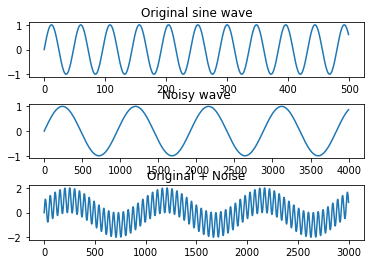

In [13]:
plt.subplot(3,1,1)

#Original Sine Wave 
plt.title("Original sine wave")
  
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])

#Noisy Wave

plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(sine_noise[:4000])

#Combined Signal 

plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:3000])
 
plt.show()

## NOISY WAVE CLEANUP

    Fast Fourier Transform is used to cleanup

    data_fft contains the fft of the combined Noise + Signal Wave.

    freq contains the absolute of the frequencies found in it.

In [14]:
data_fft = np.fft.fft(combined_signal)
 
freq = (np.abs(data_fft[:len(data_fft)]))

(0, 1200)

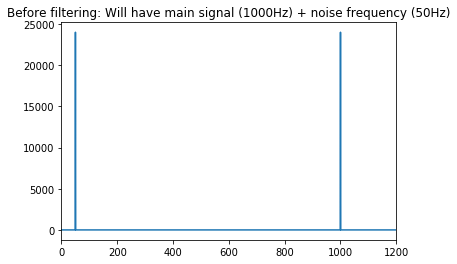

In [15]:
plt.plot(freq)
 
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
 
plt.xlim(0,1200)

    We take the fft of the signal, as before, and plot it. This time, we get two signals: Our sine wave at 1000Hz and the noise at 50Hz.

    Building a Filter using Numpy and FFT 

In [23]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

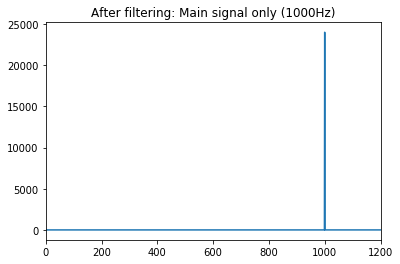

In [24]:
plt.plot(filtered_freq)
 
plt.title("After filtering: Main signal only (1000Hz)")
 
plt.xlim(0,1200)
 
plt.show()

    We take the ifft: Inverse FFT. This will take our signal and convert it back to time domain. We can now compare it with our original noisy signal.

In [25]:
recovered_signal = np.fft.ifft(filtered_freq)

C:\Users\student\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


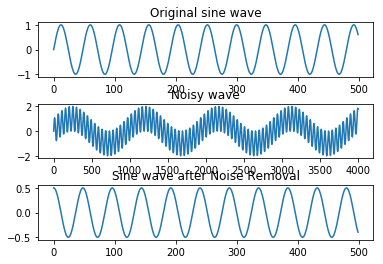

In [28]:
plt.subplot(3,1,1)
 
#Sine Wave Plot

plt.title("Original sine wave")
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
#Noisy Wave Plot

plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(combined_signal[:4000])

#Sine Wave after Noise Removal
 
plt.subplot(3,1,3)
 
plt.title("Sine wave after Noise Removal")
 
plt.plot((recovered_signal[:500]))
 
plt.show()

https://docs.scipy.org/doc/scipy/reference/signal.html

    Author: Shikhar Parikh, KJSCE.